<a href="https://colab.research.google.com/github/kuragaa/ML-HSE-24/blob/main/%D0%9B%D0%B0%D0%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv"

In [ ]:
df = pd.read_csv(DIAMONDS_DATASET)

# Подготовка данных

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe() # по числовым признакам

,carat,depth,table,price,'x','y','z'
count,53442.000000,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
mean,0.797561,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000




*   count - кол-во строк без пропусков
*   mean - среднее значение
*   std - стандартное отклонение значения

Квартили — это статистические меры, которые делят набор данных на четыре равные части.
Распределение данных разбивается на четыре четверти:
* нижний квартиль (Q1) - 25%
* медиана (Q2) - 50%
* верхний квартиль (Q3) - 70%

Квартили позволяют понять распределение данных и помогают выявить возможные выбросы, которые могут исказить анализ. Они также предоставляют меру изменчивости, что важно в статистическом анализе.

P.S - в данном методе высчитываются значения только по числовым признакам, по категориальным данные значения высчитать не можем







In [ ]:
df.describe(include='object') # по категориальным признакам

,cut,color,clarity
count,53940,53940,53940
unique,6,7,8
top,Ideal,G,SI1
freq,21524,11292,13065




*   count - число непропущенных значений (кол-во строк без пропусков)
*   unique - число различных категорий
*   top - самая популярная категория, которая встречается чаще всего в датасете
*   freq - частота, с которой встречается самая популярная категория top



In [ ]:
df.duplicated().sum() # количество дубликатов в датасете

135

In [ ]:
df[df.duplicated()] # список строк-дубликатов

,carat,cut,color,clarity,depth,table,price,'x','y','z'
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919.0,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093.0,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203.0,5.19,5.17,3.17


In [ ]:
df.drop_duplicates(inplace=True) # операция удаления дубликатов в текущей таблице, inplace - на месте
df.shape

(53805, 10)

In [ ]:
df.reset_index(inplace=True, drop=True) # после того как проредили таблицу, можно ресетнуть индексы, чтобы они снова шли подряд. drop=True - чтобы сразу удалить старый столбец с индексами

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


**Рабата с пропущенными значениями**

In [ ]:
df.isnull().mean() * 100 # среднее количество пропусков по столбцам в %

carat      0.925565
cut        0.000000
color      0.000000
clarity    0.000000
depth      1.839978
table      0.000000
price      0.000000
'x'        0.000000
'y'        0.009293
'z'        0.000000
dtype: float64

Пропусков 1-2%, можно выкинуть, так как их мало или заменить медианным значением. Пропуски присутствуют в carat, depth, y

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': "'x'"}>, <Axes: title={'center': "'y'"}>],
       [<Axes: title={'center': "'z'"}>, <Axes: >, <Axes: >]],
      dtype=object)

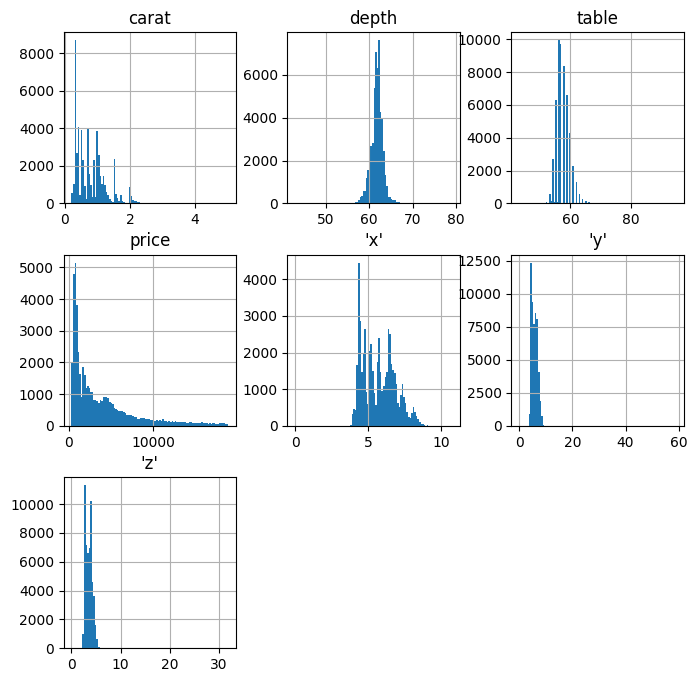

In [ ]:
df.hist(bins=100, figsize=(8,8)) # гистограмма по всем нашим числовым признакам (bins - число столбиков - чем больше, тем подробнее гистограмма)

In [ ]:
median_carat = df['carat'].median() # считаем медианное значения по столбцу
df['carat'].fillna(median_carat, inplace=True) # заменяем все пропуски медианным значением в исходной таблице (в столбце караты)

In [ ]:
median_depth = df['depth'].median()
df['depth'].fillna(median_depth, inplace=True)

In [ ]:
median_y = df["'y'"].median()
df["'y'"].fillna(median_y, inplace=True)

In [ ]:
df.isnull().sum().sum() # проверяем на пропуски. Первая сумма - кол-во пропусков по каждому столбцу, а вторая - всего пропусков

0

# Исследование мер центральной тенденции

In [ ]:
numeric_df = df.select_dtypes(include='number')

print("Среднее значение:\n", numeric_df.mean())
print()
print("Медиана:\n", numeric_df.median())
print()
print("Мода:\n", numeric_df.mode())

Среднее значение:
 carat       0.796586
depth      61.749280
table      57.458089
price    3933.562829
'x'         5.731325
'y'         5.734698
'z'         3.538800
dtype: float64

Медиана:
 carat       0.70
depth      61.80
table      57.00
price    2401.00
'x'         5.70
'y'         5.71
'z'         3.53
dtype: float64

Мода:
    carat  depth  table  price   'x'   'y'  'z'
0    0.3   61.8   56.0  605.0  4.37  4.34  2.7


Среднее значение по цене гораздо выше медианы по цене - это может свидетельствовать он наличии нескольких очень дорогих алмазов в датасете. Мода по цене значительно ниже среднего и медианы, что может свидетельствовать о том, что в датасете больше алмазов с небольшой ценой

# Визуализация данных

**Гистограммы**

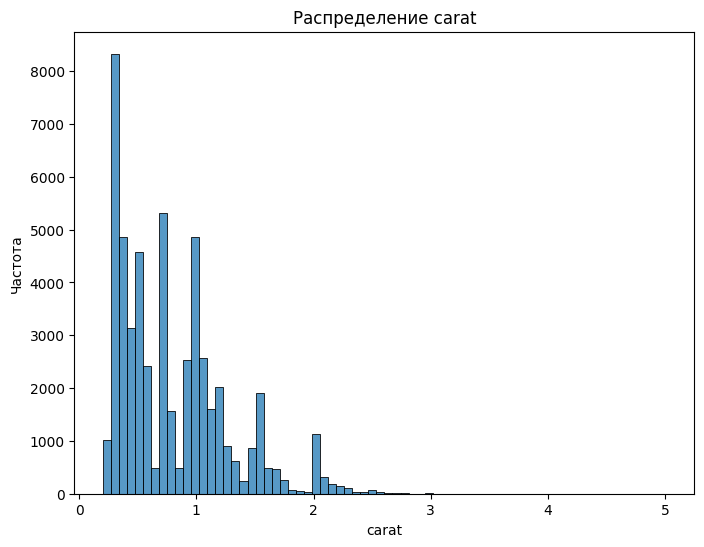

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['carat'], bins=70)
plt.title('Распределение carat')
plt.xlabel('carat')
plt.ylabel('Частота')
plt.show()

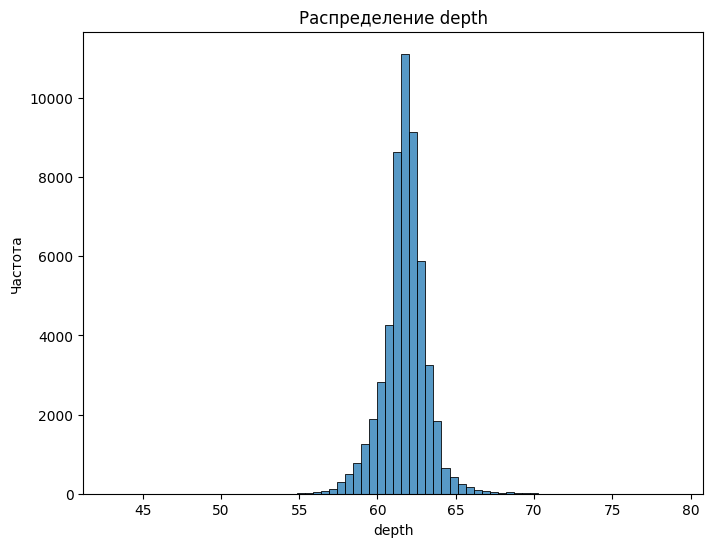

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['depth'], bins=70)
plt.title('Распределение depth')
plt.xlabel('depth')
plt.ylabel('Частота')
plt.show()

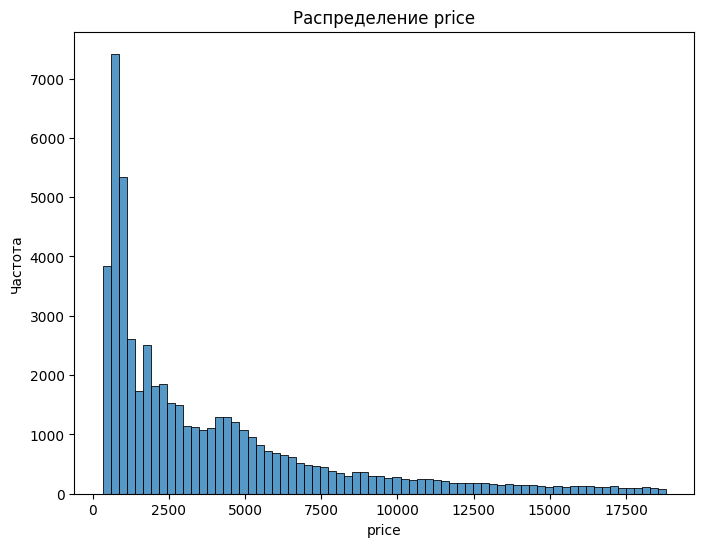

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=70)
plt.title('Распределение price')
plt.xlabel('price')
plt.ylabel('Частота')
plt.show()

**Boxplot**

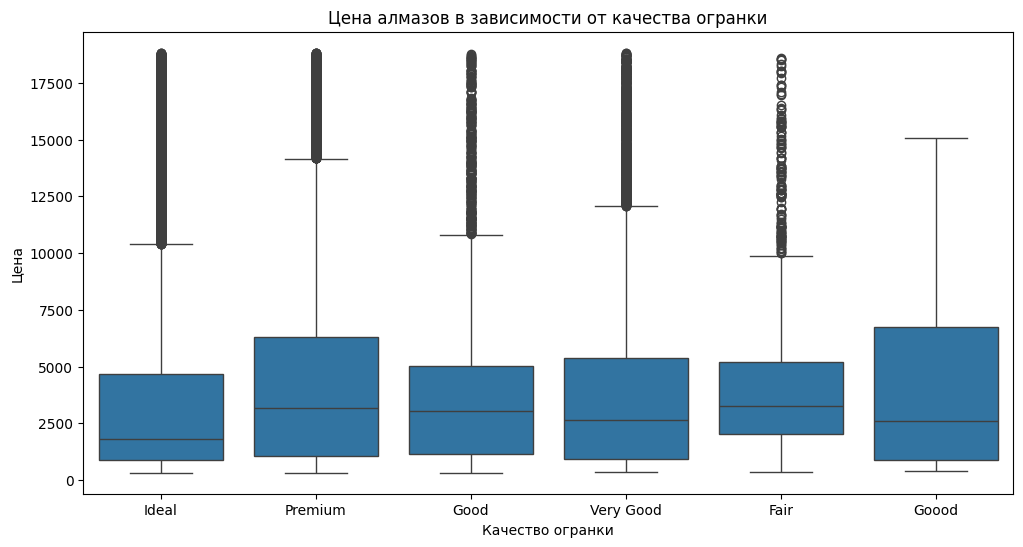

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Цена алмазов в зависимости от качества огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Цена')
plt.show()

Можно заметить, что в качестве огранки присутствует вариант 'Goood', что, очевидно, ошибка.

In [ ]:
df['cut'].value_counts(normalize=True)

cut
Ideal        0.398941
Premium      0.255088
Very Good    0.224013
Good         0.090772
Fair         0.029700
Goood        0.001487
Name: proportion, dtype: float64

In [ ]:
df['cut'] = df['cut'].replace('Goood', 'Good')

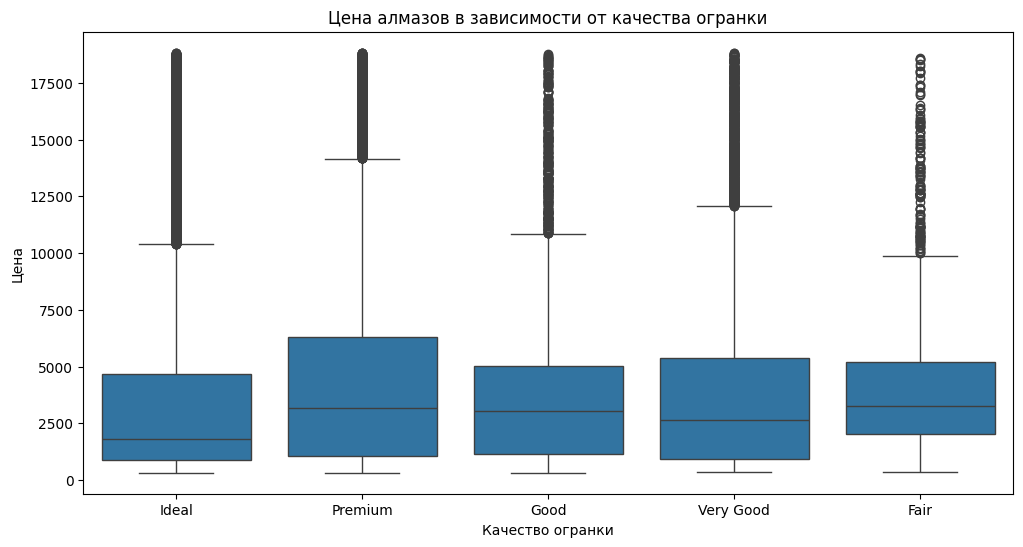

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Цена алмазов в зависимости от качества огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Цена')
plt.show()

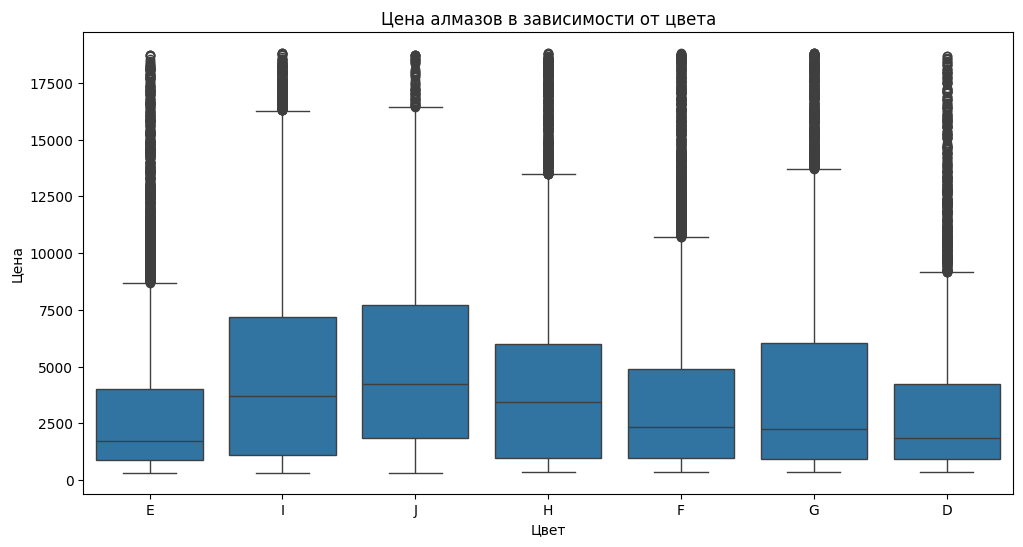

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='price', data=df)
plt.title('Цена алмазов в зависимости от цвета')
plt.xlabel('Цвет')
plt.ylabel('Цена')
plt.show()

**Scatter plot**

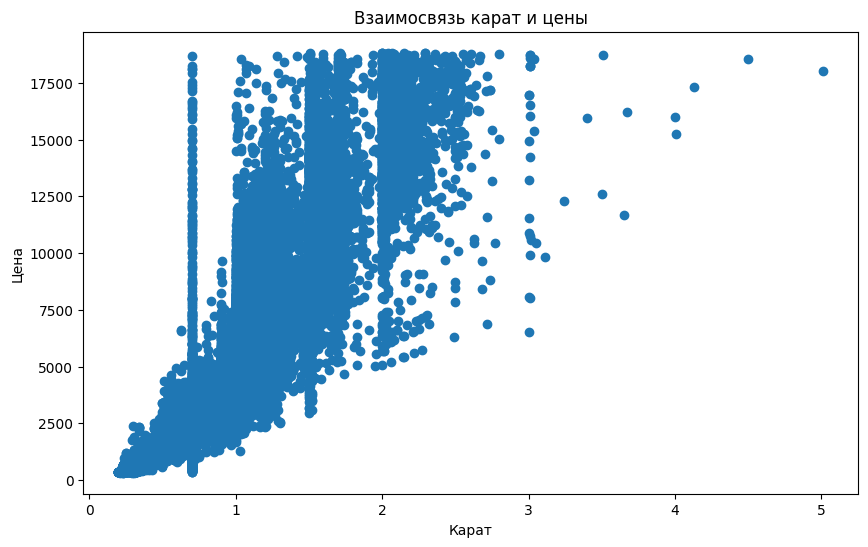

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.carat, df.price)
plt.title('Взаимосвязь карат и цены')
plt.xlabel('Карат')
plt.ylabel('Цена')
plt.show()

# Исследование мер вариативности

In [ ]:
print('Стандартное отклонение:\n', df[['carat', 'depth', 'price']].std())
print()
print('Диапазон:\n', df[['carat', 'depth', 'price']].apply(lambda x: x.max() - x.min()))

Стандартное отклонение:
 carat       0.471000
depth       1.415741
price    3988.926733
dtype: float64

Диапазон:
 carat        4.81
depth       36.00
price    18497.00
dtype: float64


# Корреляционная матрица

Корреляционная матрица:
           carat     depth     table     price       'x'       'y'       'z'
carat  1.000000  0.028355  0.179995  0.916499  0.970240  0.946804  0.948485
depth  0.028355  1.000000 -0.294340 -0.010832 -0.024473 -0.026859  0.094559
table  0.179995 -0.294340  1.000000  0.126622  0.194871  0.183160  0.150300
price  0.916499 -0.010832  0.126622  1.000000  0.884551  0.865376  0.861271
'x'    0.970240 -0.024473  0.194871  0.884551  1.000000  0.974545  0.970702
'y'    0.946804 -0.026859  0.183160  0.865376  0.974545  1.000000  0.951805
'z'    0.948485  0.094559  0.150300  0.861271  0.970702  0.951805  1.000000



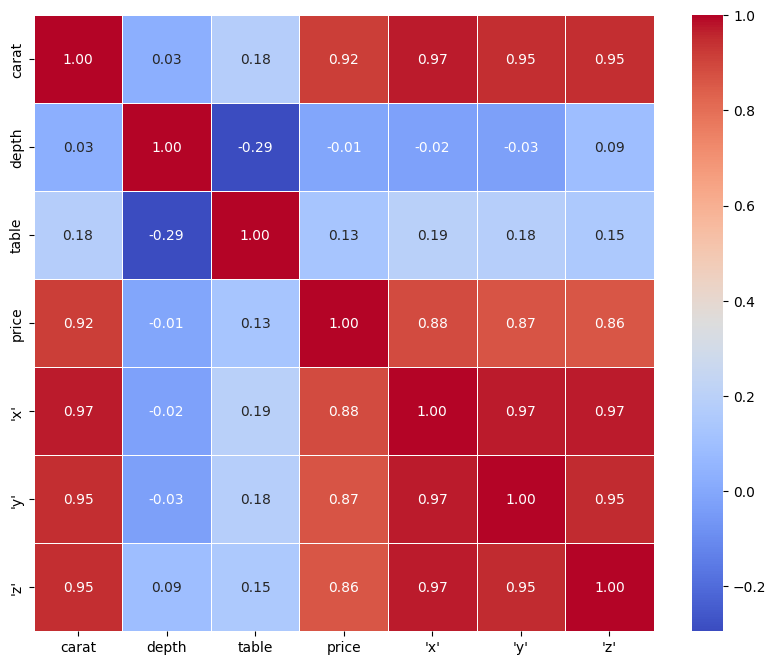

In [ ]:
numeric_df = df.select_dtypes(include='number')
matrix = numeric_df.corr()
print('Корреляционная матрица:\n', matrix)
print()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()